## Simulate Gastropod Shell Growth Using CA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image

# Parameters
growth_rate_w = 0.2  # Controls spiral width
growth_rate_h = 0.1  # Controls spiral height
angle_step = 0.1  # Controls angular resolution
time_steps = 200  # Total steps in simulation

# Function to generate shell points in polar coordinates
def generate_shell_points(growth_rate_w, growth_rate_h, time_steps, angle_step):
    theta = np.arange(0, time_steps * angle_step, angle_step)  # Angular values
    r = np.exp(growth_rate_w * theta)  # Radial distance
    h = -growth_rate_h * theta  # Height decreases with angle
    return theta, r, h

# Function to plot the shell
def plot_shell(theta, r, h, step, save_path=None):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, h, color='brown', lw=2)
    ax.set_title(f"Shell Growth Step {step}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Height")
    ax.grid(False)
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.close(fig)

# Generate points for the shell
theta, r, h = generate_shell_points(growth_rate_w, growth_rate_h, time_steps, angle_step)

# Save each step as an image for GIF creation
images = []
for step in range(1, len(theta)):
    plot_shell(theta[:step], r[:step], h[:step], step, save_path=f"shell_step_{step}.png")
    images.append(Image.open(f"shell_step_{step}.png"))

# Create an animated GIF
gif_path = "realistic_shell_growth.gif"
images[0].save(
    gif_path, save_all=True, append_images=images[1:], duration=50, loop=0
)

gif_path

'realistic_shell_growth.gif'

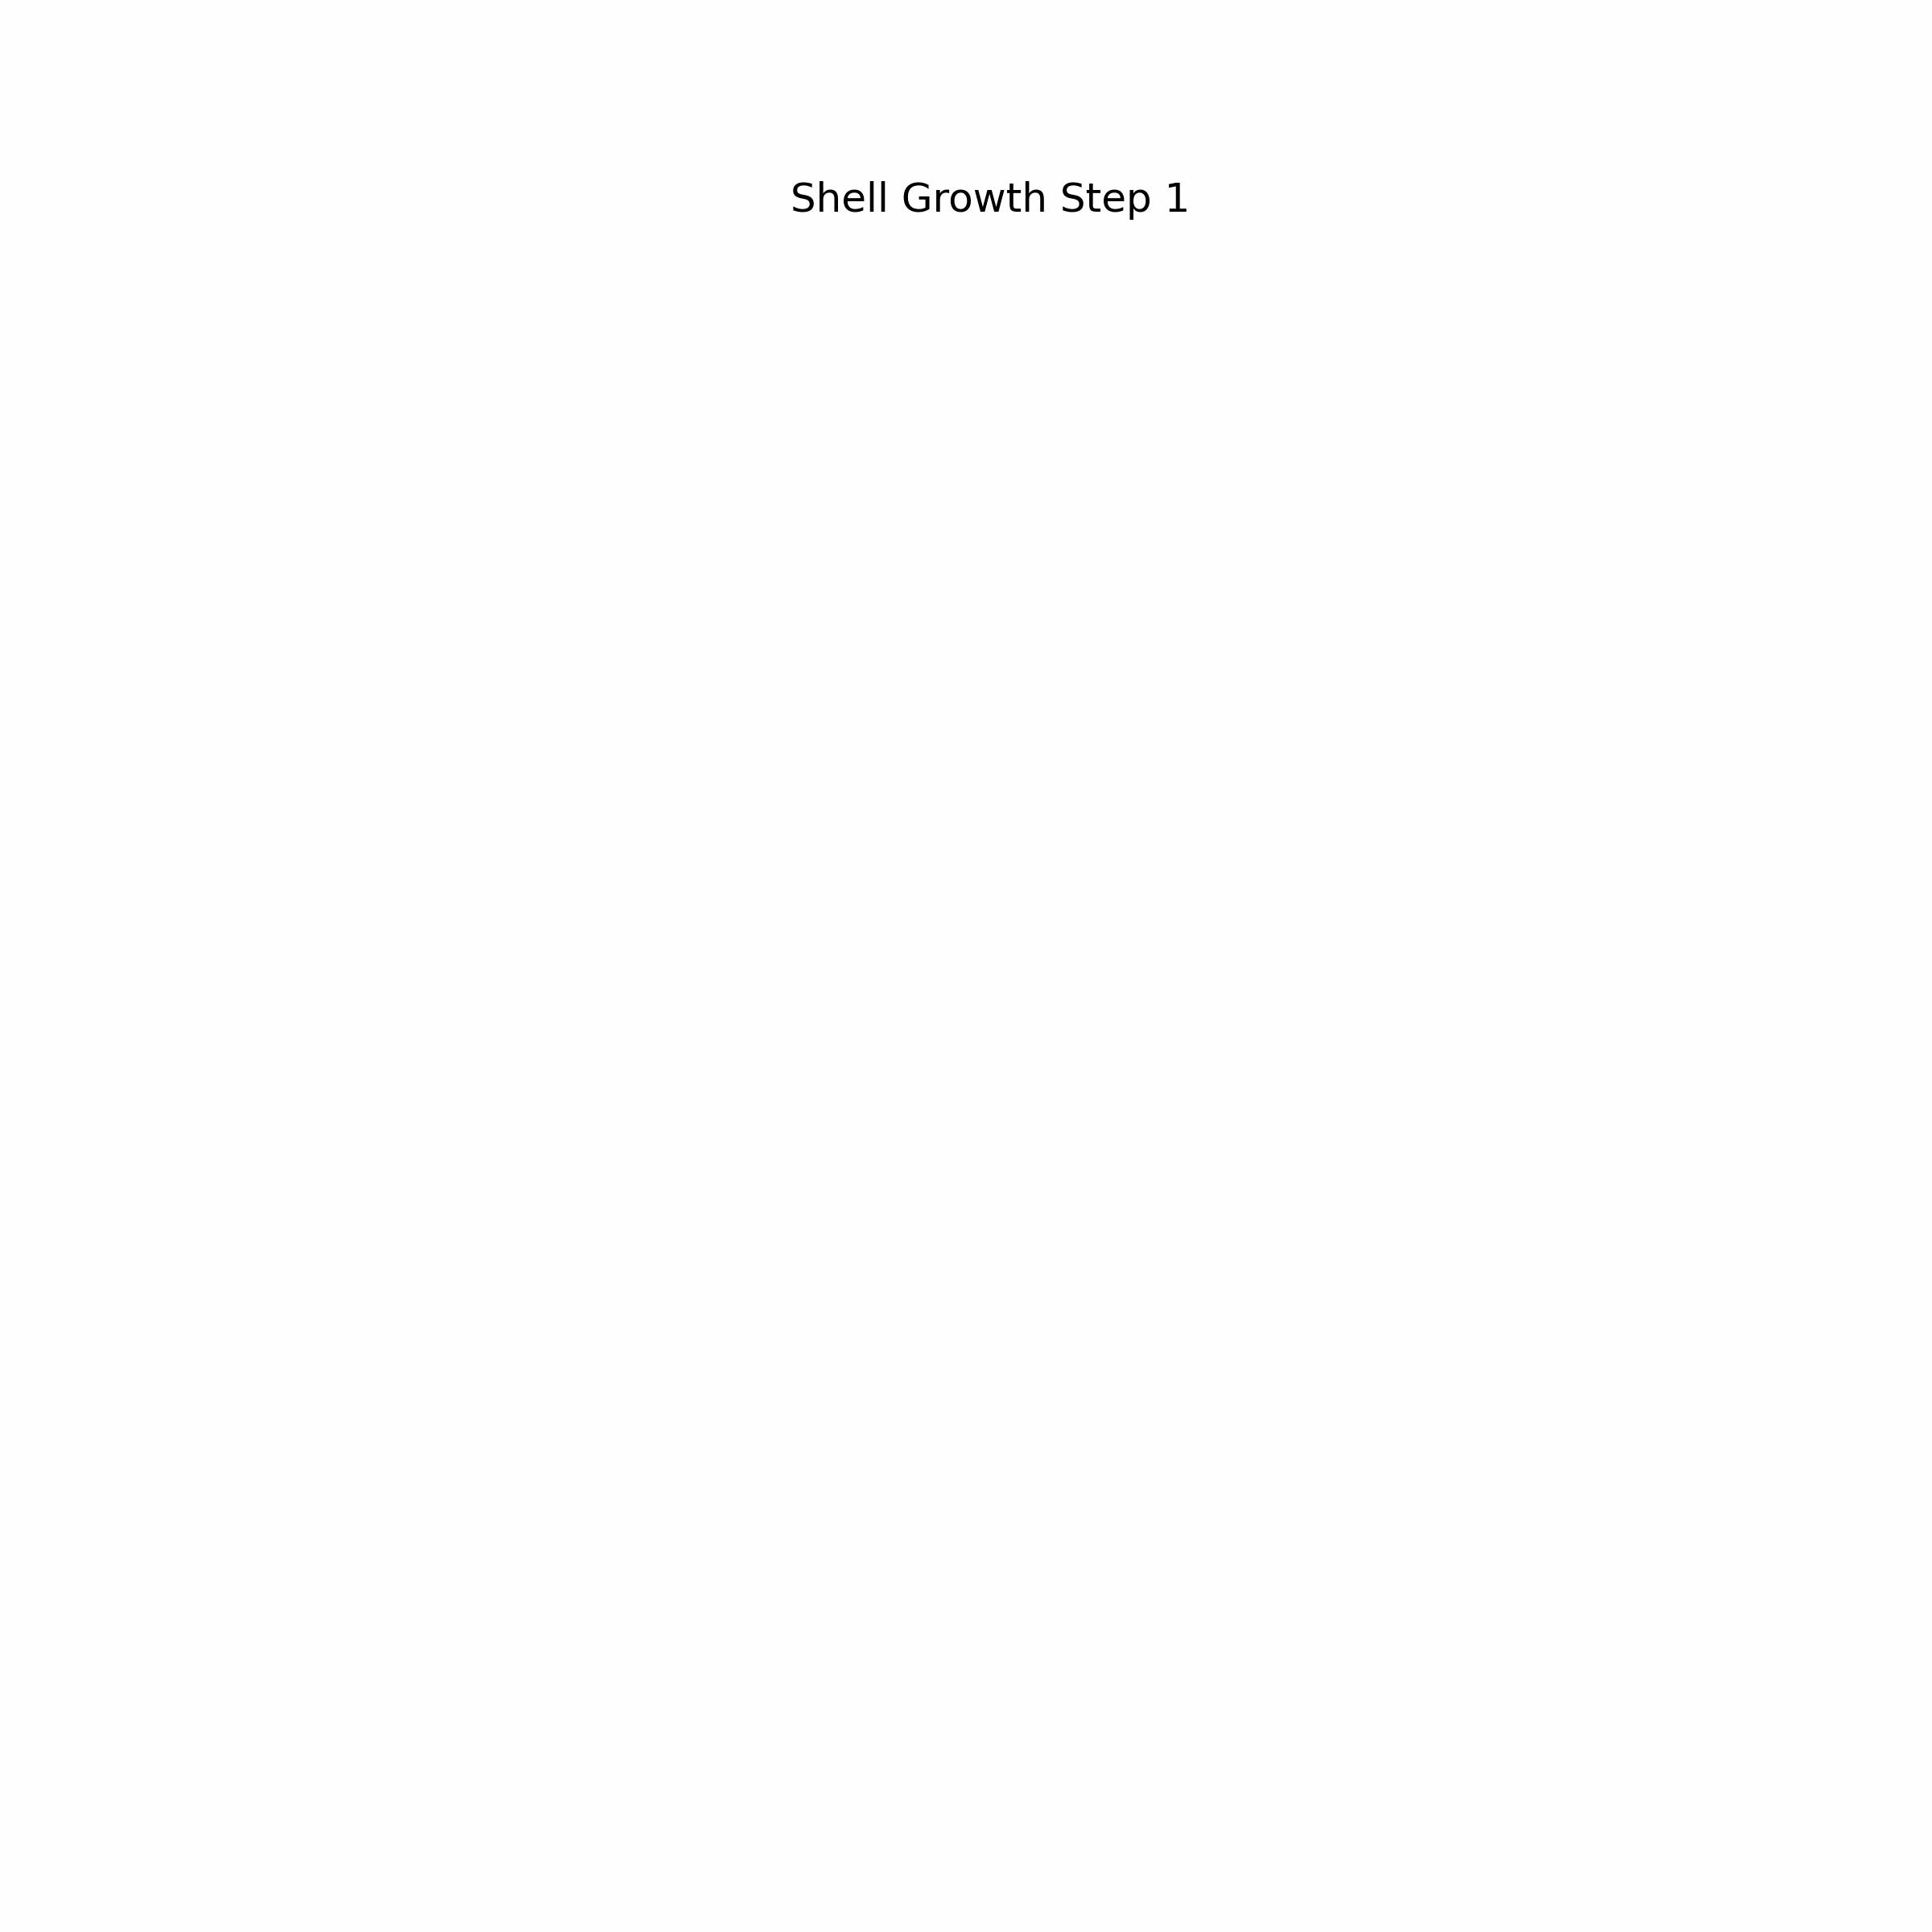

In [8]:
from IPython.display import Image
Image(filename=gif_path)


## Filled Shell

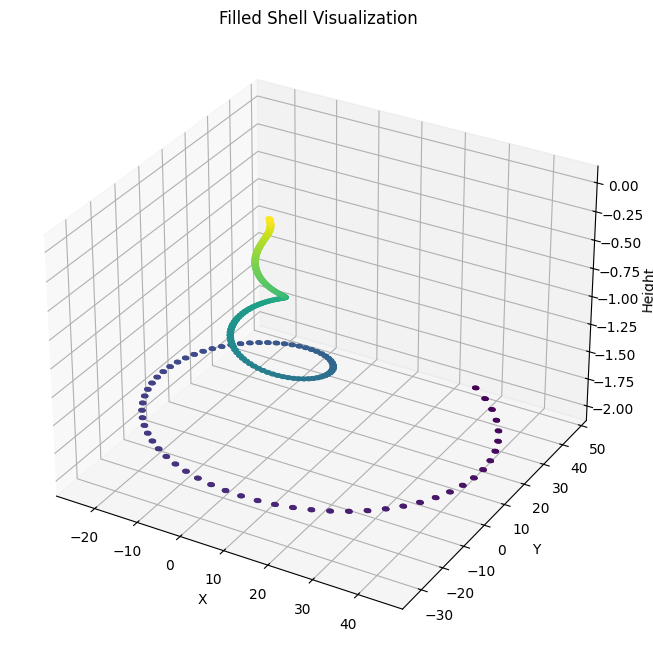

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
growth_rate_w = 0.2  # Controls spiral width
growth_rate_h = 0.1  # Controls spiral height
angle_step = 0.1  # Angular resolution
time_steps = 200  # Total steps in simulation
aperture_radius = 0.5  # Radius of the circular cross-section

# Function to generate shell points with cross-sections
def generate_filled_shell(growth_rate_w, growth_rate_h, time_steps, angle_step, aperture_radius):
    theta = np.arange(0, time_steps * angle_step, angle_step)  # Angular values
    r = np.exp(growth_rate_w * theta)  # Radial distance
    h = -growth_rate_h * theta  # Height decreases with angle

    # Generate cross-sectional points (circle) for each step
    shell_points = []
    for t, radius, height in zip(theta, r, h):
        x_center = radius * np.cos(t)
        y_center = radius * np.sin(t)
        
        # Generate circular cross-section points
        cross_section = [
            (x_center + aperture_radius * np.cos(a),
             y_center + aperture_radius * np.sin(a),
             height)
            for a in np.linspace(0, 2 * np.pi, 20)
        ]
        shell_points.extend(cross_section)
    return np.array(shell_points)

# Generate the filled shell
shell_points = generate_filled_shell(
    growth_rate_w, growth_rate_h, time_steps, angle_step, aperture_radius
)

# Plot the filled shell
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
x, y, z = shell_points[:, 0], shell_points[:, 1], shell_points[:, 2]

# Scatter plot with small points to visualize the filled structure
ax.scatter(x, y, z, s=1, c=z, cmap='viridis', alpha=0.8)

# Set plot aesthetics
ax.set_title("Filled Shell Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height")
plt.show()


## Wider Shell Visualization

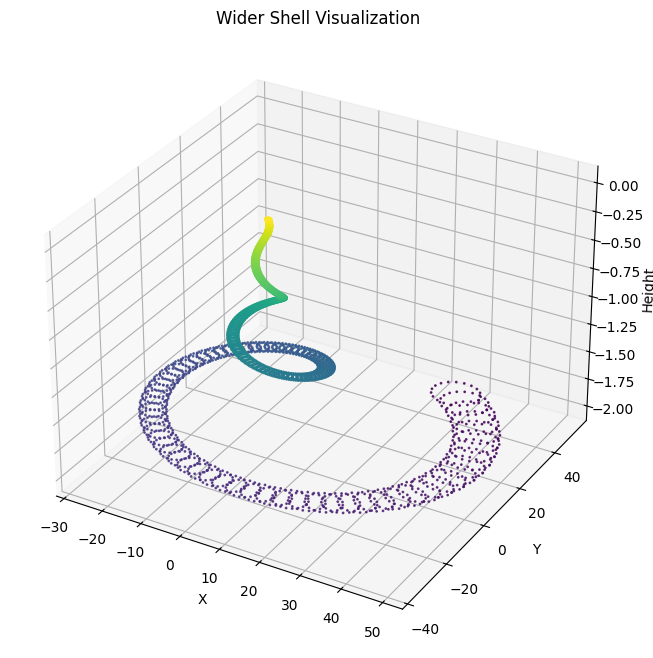

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
growth_rate_w = 0.2  # Controls spiral width
growth_rate_h = 0.1  # Controls spiral height
angle_step = 0.1  # Angular resolution
time_steps = 200  # Total steps in simulation
base_aperture_radius = 0.5  # Base radius of the cross-section
aperture_scaling = 0.1  # Scaling factor for aperture growth

# Function to generate shell points with wider cross-sections
def generate_filled_shell(growth_rate_w, growth_rate_h, time_steps, angle_step, base_aperture_radius, aperture_scaling):
    theta = np.arange(0, time_steps * angle_step, angle_step)  # Angular values
    r = np.exp(growth_rate_w * theta)  # Radial distance
    h = -growth_rate_h * theta  # Height decreases with angle

    # Generate cross-sectional points (circle) for each step
    shell_points = []
    for t, radius, height in zip(theta, r, h):
        x_center = radius * np.cos(t)
        y_center = radius * np.sin(t)
        
        # Adjust aperture radius based on the radial distance
        aperture_radius = base_aperture_radius + aperture_scaling * radius
        
        # Generate circular cross-section points
        cross_section = [
            (x_center + aperture_radius * np.cos(a),
             y_center + aperture_radius * np.sin(a),
             height)
            for a in np.linspace(0, 2 * np.pi, 20)
        ]
        shell_points.extend(cross_section)
    return np.array(shell_points)

# Generate the filled shell
shell_points = generate_filled_shell(
    growth_rate_w, growth_rate_h, time_steps, angle_step, base_aperture_radius, aperture_scaling
)

# Plot the filled shell
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
x, y, z = shell_points[:, 0], shell_points[:, 1], shell_points[:, 2]

# Scatter plot with small points to visualize the filled structure
ax.scatter(x, y, z, s=1, c=z, cmap='viridis', alpha=0.8)

# Set plot aesthetics
ax.set_title("Wider Shell Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height")
plt.show()


## Elliptic visualization

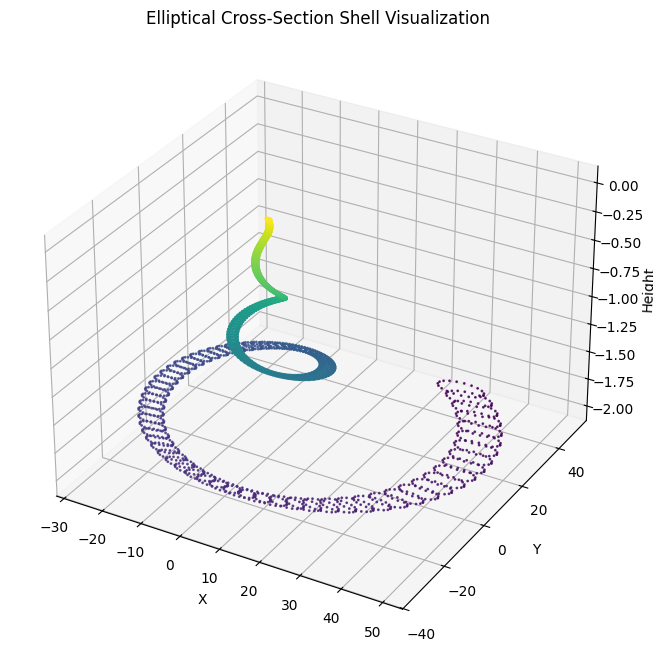

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
growth_rate_w = 0.2  # Controls spiral width
growth_rate_h = 0.1  # Controls spiral height
angle_step = 0.1  # Angular resolution
time_steps = 200  # Total steps in simulation
base_aperture_width = 0.5  # Base width of the cross-section (ellipse)
base_aperture_height = 0.2  # Base height of the cross-section (ellipse)
aperture_scaling = 0.1  # Scaling factor for aperture growth

# Function to generate shell points with elliptical cross-sections
def generate_elliptical_shell(growth_rate_w, growth_rate_h, time_steps, angle_step,
                              base_aperture_width, base_aperture_height, aperture_scaling):
    theta = np.arange(0, time_steps * angle_step, angle_step)  # Angular values
    r = np.exp(growth_rate_w * theta)  # Radial distance
    h = -growth_rate_h * theta  # Height decreases with angle

    # Generate elliptical cross-sectional points for each step
    shell_points = []
    for t, radius, height in zip(theta, r, h):
        x_center = radius * np.cos(t)
        y_center = radius * np.sin(t)
        
        # Adjust aperture dimensions based on the radial distance
        aperture_width = base_aperture_width + aperture_scaling * radius
        aperture_height = base_aperture_height + aperture_scaling * radius * 0.5
        
        # Generate elliptical cross-section points
        cross_section = [
            (x_center + aperture_width * np.cos(a),
             y_center + aperture_height * np.sin(a),
             height)
            for a in np.linspace(0, 2 * np.pi, 20)
        ]
        shell_points.extend(cross_section)
    return np.array(shell_points)

# Generate the filled shell with elliptical cross-sections
elliptical_shell_points = generate_elliptical_shell(
    growth_rate_w, growth_rate_h, time_steps, angle_step,
    base_aperture_width, base_aperture_height, aperture_scaling
)

# Plot the shell with elliptical cross-sections
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates
x, y, z = elliptical_shell_points[:, 0], elliptical_shell_points[:, 1], elliptical_shell_points[:, 2]

# Scatter plot with small points to visualize the filled structure
ax.scatter(x, y, z, s=1, c=z, cmap='viridis', alpha=0.8)

# Set plot aesthetics
ax.set_title("Elliptical Cross-Section Shell Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height")
plt.show()


Step 2: Smooth Surface Rendering

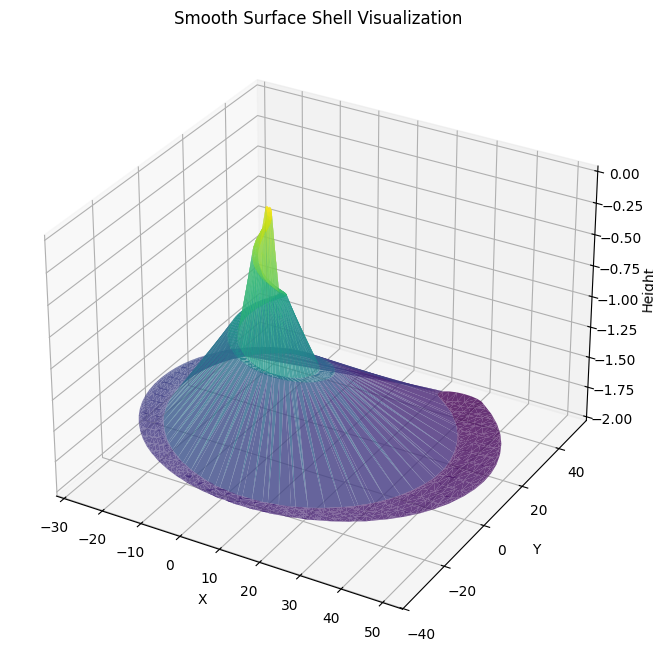

In [13]:
from scipy.spatial import Delaunay

# Generate the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface by triangulating the points
tri = Delaunay(elliptical_shell_points[:, :2])  # Use x and y coordinates for triangulation
ax.plot_trisurf(
    elliptical_shell_points[:, 0],  # X-coordinates
    elliptical_shell_points[:, 1],  # Y-coordinates
    elliptical_shell_points[:, 2],  # Z-coordinates
    triangles=tri.simplices, cmap="viridis", alpha=0.8
)

# Set plot aesthetics
ax.set_title("Smooth Surface Shell Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height")
plt.show()


## Step 3: Texturing

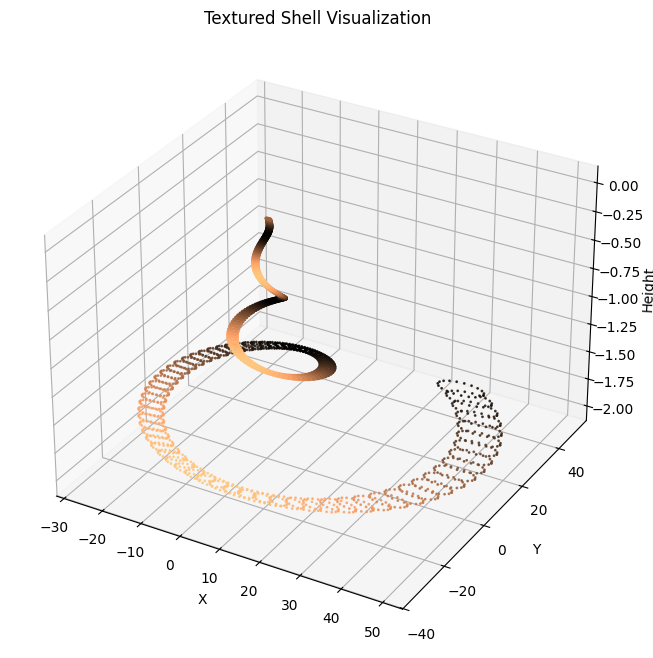

: 

In [14]:
# Define a texture pattern (striped bands)
def generate_texture(z):
    return np.sin(z * 10) * 0.5 + 0.5  # Stripe effect

# Apply the texture
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Texture mapping
colors = generate_texture(elliptical_shell_points[:, 2])  # Use Z-coordinates for texture pattern
ax.scatter(
    elliptical_shell_points[:, 0],
    elliptical_shell_points[:, 1],
    elliptical_shell_points[:, 2],
    c=colors, cmap="copper", s=1, alpha=0.8
)

# Set plot aesthetics
ax.set_title("Textured Shell Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height")
plt.show()
